In [18]:
# 必要なライブラリのインストール
!pip install -q japanize-matplotlib

In [19]:
# 後で使う機能の準備
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np
import japanize_matplotlib


def plot(X, title=None, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=[4, 4])
    patch = patches.Polygon(
        xy=X.T[[0, 1, 2]],
        closed=True,
        facecolor="skyblue",
        edgecolor="black",
        linewidth=3,
    )
    ax.add_patch(patch)
    patch = patches.Polygon(
        xy=X.T[[0, 3, 2]],
        closed=True,
        facecolor="pink",
        edgecolor="black",
        linewidth=3,
    )
    ax.add_patch(patch)

    x, y = X
    ax.hlines(0, x.min() - 1, x.max() + 1, color="k")
    ax.vlines(0, y.min() - 1, y.max() + 1, color="k")
    ax.set_title(title, fontsize=16)
    ax.autoscale()
    ax.axis("equal")
    ax.grid()


def multiplot(*arr, titles=None):
    num = len(arr)
    if titles is None:
        titles = [None] * num
    _, axes = plt.subplots(1, num, figsize=[4 * num, 4])
    for x, ax, title in zip(arr, axes, titles):
        plot(x, title, ax)


def plot_eigvec(A, width):
    l, V = np.linalg.eig(A)
    if np.iscomplex(l).any():
        print("実数の固有値、固有ベクトルがない")
        return
    vx, vy = (l * V).T
    plt.arrow(0, 0, *vx, width=width, length_includes_head=True)
    plt.arrow(0, 0, *vy, width=width, length_includes_head=True)


In [20]:
X = np.array(
    [
        [0, 0],  # 左下の座標
        [1, 0],  # 右下の座標
        [1, 1],  # 右上の座標
        [0, 1],  # 左上の座標
    ]
).T

# print("行列 X:")
# print(X)
# plot(X)


## 固有値と固有ベクトル

さて、色々な変換を見てきましたが、毎回この図を使ってイメージするのは面倒だし、多次元空間だとそもそも可視化不可能です。  
そんなとき、固有値は固有ベクトルを求めれば、とある行列 $A$ がどのように $X$ を変換するのかを知ることが出来ます。  

これらは `np.linalg.eig` で求められます。今回は、グラフに固有ベクトルを表示する `plot_eigvec` 関数を用意しました。  
矢印の長さは、各固有ベクトルに対応する固有値です。


## 行列式

固有値の積

## いろんな行列



### 単位行列

行列式: 1.0


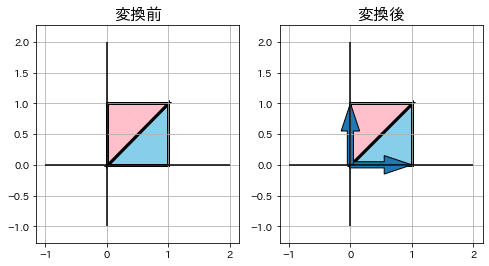

In [21]:
I = np.array(
    [
        [1, 0],
        [0, 1],
    ]
)

Y = I @ X
multiplot(X, Y, titles=["変換前", "変換後"])
plot_eigvec(I, width=0.1)
print("行列式:", np.linalg.det(I))


### 直交行列


実数の固有値、固有ベクトルがない
行列式: 1.0


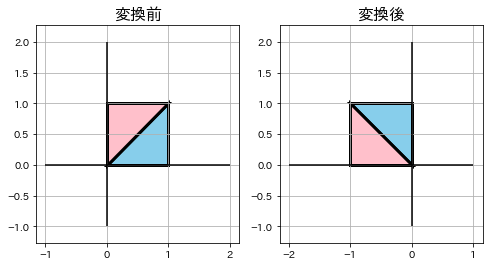

In [22]:
from numpy import sin, cos, pi

theta = pi / 2
R = np.array(
    [
        [cos(theta), -sin(theta)],
        [sin(theta), cos(theta)],
    ]
)

Y = R @ X
multiplot(X, Y, titles=["変換前", "変換後"])
plot_eigvec(R, width=0.1)
print("行列式:", np.linalg.det(R))


- 回転行列の固有ベクトルの成分は実数では表すことができません。
- 回転では面積が変わらないので、行列式は 1 になります。
- （興味あれば）回転行列の固有値は $e^{i\theta} = \cos\theta + i\sin\theta$ と表すことができるので、固有値からどのように回転したのかを逆算できます（以下、
  参照）。


In [23]:
l, _ = np.linalg.eigvals(R)
theta, np.angle(l)

(1.5707963267948966, 1.5707963267948966)

次に、裏返すタイプの直交行列を掛けてみましょう。以下の定義だと、$y=x\tan\theta$ に関して線対称に裏返します。



行列式: -1.0


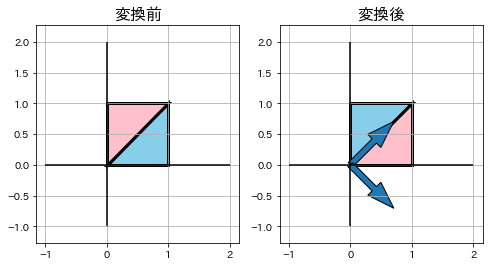

In [26]:
theta = pi / 4
U = np.array(
    [
        [cos(2 * theta), sin(2 * theta)],
        [sin(2 * theta), -cos(2 * theta)],
    ]
)

Y = U @ X
multiplot(X, Y, titles=["変換前", "変換後"])
plot_eigvec(U, width=0.1)
print("行列式:", np.linalg.det(U))


- 固有ベクトルは、裏返す基準になった線とその垂線になります（多分。未証明）。
- 回転と同じく、反転では面積が変わりません。ただし、裏返した場合は、行列式は -1 になります。
  - 注: 裏返しを 2 回することは回転を 1 回することと同じです。なので、例えば x 軸も y 軸も裏返したときの行列式は 1 です。


### 対角行列

行列式: 2.0


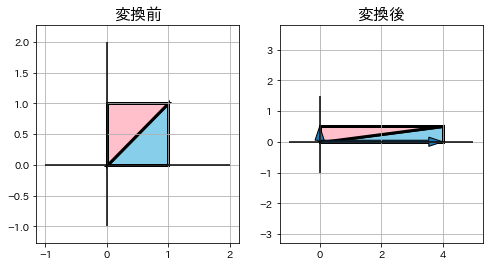

In [27]:
D = np.array(
    [
        [4, 0],  # x 方向に 4 倍
        [0, 0.5],  # y 方向に 0.5 倍
    ]
)

Y = D @ X
multiplot(X, Y, titles=["変換前", "変換後"])
plot_eigvec(D, width=0.1)
print("行列式:", np.linalg.det(D))


- 固有ベクトルは、xy 軸上にあります。
- 面積が $4*0.5=2$ 倍になるので行列式は 2 です。


### せん断行列

僕もせん断という言葉はあまり聞いたことがないです。線形代数の教科書でよく目にする用語に言い換えると、（全ての対角成分が 1 の）三角行列です。

行列式: 1.0


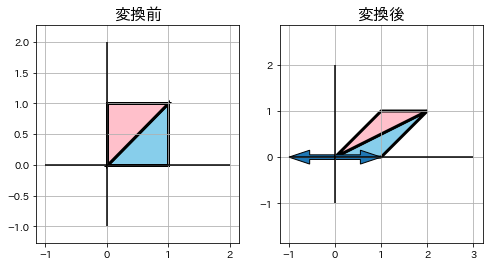

In [46]:
u = 1
U = np.array(
    [
        [1, u],  # x 方向に歪ませる
        [0, 1],  # y はそのまま
    ]
)

Y = U @ X
multiplot(X, Y, titles=["変換前", "変換後"])
plot_eigvec(U, width=0.1)
print("行列式:", np.linalg.det(U))


- 固有ベクトルを見ると、左右に歪ませていることが分かります。
- 対角成分が全て 1 なら、底辺と高さが変わらないので面積も変わらないため、行列式は 1 です。

行列式: 1.0


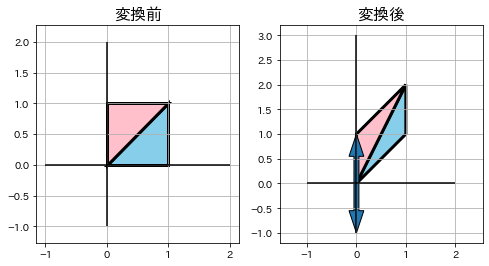

In [48]:
l = 1
L = np.array(
    [
        [1, 0],  # x はそのまま
        [l, 1],  # y 方向に歪ませる
    ]
)

Y = L @ X
multiplot(X, Y, titles=["変換前", "変換後"])
plot_eigvec(L, width=0.1)
print("行列式:", np.linalg.det(L))


### 非正則行列

Singular matrix
行列式: 0.0


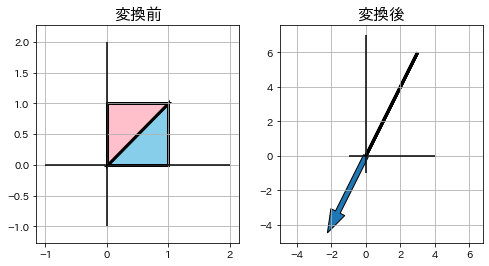

In [54]:
S = np.array(
    [
        [1, 2],
        [2, 4],
    ]
)

Y = S @ X
try:
    Z = np.linalg.inv(S) @ Y
except np.linalg.LinAlgError as e:
    print(e)
multiplot(X, Y, titles=["変換前", "変換後"])
plot_eigvec(S, width=0.3)
print("行列式:", np.linalg.det(S))


- この図だと固有ベクトルが 1 本しか見えないですが、固有値 0 に対応する固有ベクトルもあります。
- 面積が 0 になるので行列式は 0 です。

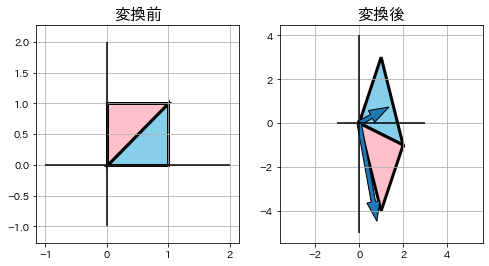

In [40]:
Y = A @ X
multiplot(X, Y, titles=["変換前", "変換後"])
plot_eigvec(A, width=0.2)


## 行列式

固有値の積

## 行列の分解

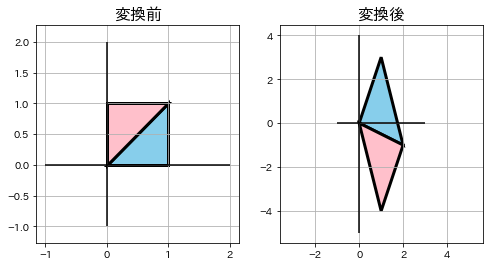

In [41]:
Y = A @ X
multiplot(X, Y, titles=["変換前", "変換後"])

### LU 分解

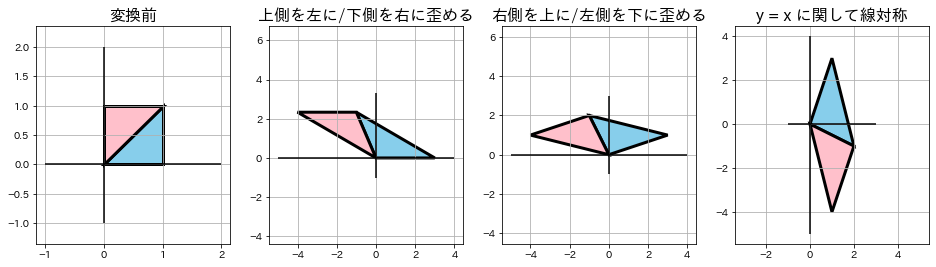

In [42]:
from scipy.linalg import lu

P, L, U = lu(A)

Y1 = U @ X
Y2 = L @ Y1
Y3 = P @ Y2
multiplot(X, Y1, Y2, Y3, titles=["変換前", "上側を左に/下側を右に歪める", "右側を上に/左側を下に歪める", "y = x に関して線対称"])

In [43]:
d, V = np.linalg.eig(A)
D = np.diag(np.abs(d))
U = np.diag(np.sign(d))

Y1 = inv(V) @ X
Y2 = D @ Y1
Y3 = U @ Y2
Y4 = V @ Y3

multiplot(
    X, Y1, Y2, Y3, Y4, titles=["0. 最初", "1. とある変換をして", "2-1. 伸ばして", "2-2. 裏返して", "3. とある逆変換をする"]
)


NameError: name 'inv' is not defined

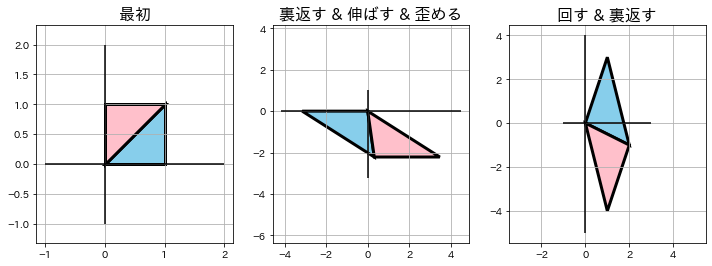

In [ ]:
Q, R = np.linalg.qr(A)

Y1 = R @ X
Y2 = Q @ Y1

multiplot(X, Y1, Y2, titles=["最初", "裏返す & 伸ばす & 歪める", "回す & 裏返す"])

# d = R.diagonal()
# D = np.diag(np.abs(d))
# U = np.diag(np.sign(d))
# R /= d

# Y1 = D @ X
# Y2 = U @ Y1
# Y3 = R @ Y2
# Y4 = Q @ Y3

# multiplot(
#     X, Y1, Y2, Y3, Y4, titles=["0. 最初", "1. 伸ばして", "2-1. 裏返して", "2-2. 裏返して", "3. とある逆変換をする"]
# )


In [ ]:




# plot_eigvec(I, width=0.08)


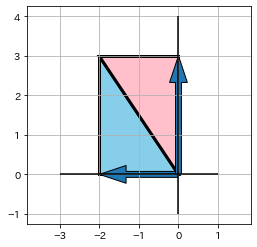

In [ ]:
A = np.array(
    [
        [-2, 0],
        [0, 3],
    ]
)

plot(A @ X)
plot_eigvec(A, width=0.15)


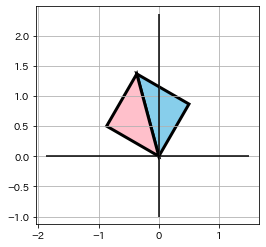

In [ ]:
from numpy import pi, cos, sin

theta = pi / 3
A = np.array(
    [
        [cos(theta), -sin(theta)],
        [sin(theta), cos(theta)],
    ]
)

plot(A @ X)
# eigvec(A, width=0.1)


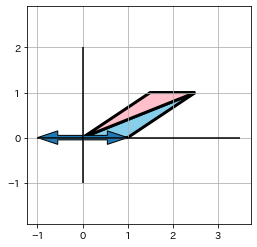

In [ ]:
A = np.array(
    [
        [1, 1.5],
        [0, 1],
    ]
)

plot(A @ X)
plot_eigvec(A, width=0.1)

In [ ]:
from numpy.linalg import *

A = np.array(
    [
        [1, 1],
        [0, 1],
    ]
)
L = np.array(
    [
        [1, 0],
        [0, 3],
    ]
)
print(A @ L @ inv(A))


[[1. 2.]
 [0. 3.]]


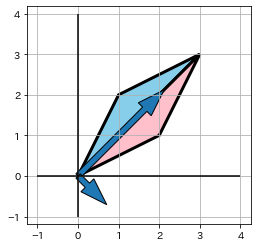

In [ ]:
from numpy.linalg import *

A = np.array(
    [
        [1, 2],
        [2, 1],
    ]
)

plot(A @ X)
plot_eigvec(A, width=0.15)


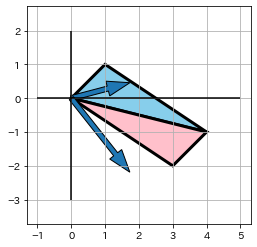

In [ ]:
from numpy.linalg import *

B = np.array(
    [
        [1, 3],
        [1, -2],
    ]
)

plot(B @ X)
plot_eigvec(B, width=0.15)


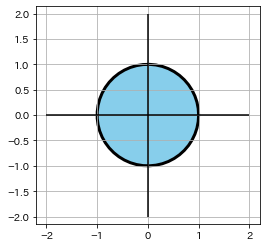

In [ ]:
X2 = np.vstack([cos(np.linspace(0, 2 * pi, 50)), sin(np.linspace(0, 2 * pi, 50))])

_, ax = plt.subplots(figsize=[4, 4])
patch = patches.Polygon(
    xy=X2.T,
    closed=True,
    facecolor="skyblue",
    edgecolor="black",
    linewidth=3,
)
ax.add_patch(patch)

x, y = X2
ax.hlines(0, x.min() - 1, x.max() + 1, color="k")
ax.vlines(0, y.min() - 1, y.max() + 1, color="k")
# ax.set_title(title, fontsize=16)
ax.autoscale()
ax.axis("equal")
ax.grid()


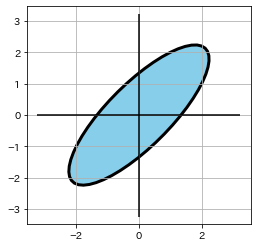

In [ ]:
Y = A @ X2

_, ax = plt.subplots(figsize=[4, 4])
patch = patches.Polygon(
    xy=Y.T,
    closed=True,
    facecolor="skyblue",
    edgecolor="black",
    linewidth=3,
)
ax.add_patch(patch)

x, y = Y
ax.hlines(0, x.min() - 1, x.max() + 1, color="k")
ax.vlines(0, y.min() - 1, y.max() + 1, color="k")
# ax.set_title(title, fontsize=16)
ax.autoscale()
ax.axis("equal")
ax.grid()


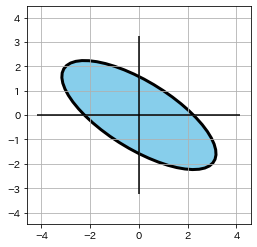

In [ ]:
Y = B @ X2

_, ax = plt.subplots(figsize=[4, 4])
patch = patches.Polygon(
    xy=Y.T,
    closed=True,
    facecolor="skyblue",
    edgecolor="black",
    linewidth=3,
)
ax.add_patch(patch)

x, y = Y
ax.hlines(0, x.min() - 1, x.max() + 1, color="k")
ax.vlines(0, y.min() - 1, y.max() + 1, color="k")
# ax.set_title(title, fontsize=16)
ax.autoscale()
ax.axis("equal")
ax.grid()
